# SC2001 Project 1: Integration of Mergesort & Insertion Sort


## Importing Modules

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# Algorithm Implementation (A)

## Insertion Sort

In [ ]:
def insertion_Sort(arr):  # Returns number of key comparisons.
    key_comparison = 0
    for i in range(1, len(arr)):
        temp = arr[i]
        j = i - 1
        # Move elements of arr[0..i-1], that are
        # greater than temp, to one position ahead
        # of their current position
        while j >= 0 and temp < arr[j]:
            key_comparison += 1
            arr[j + 1] = arr[j]
            j -= 1
        # One more comparison happens after the while loop, if j >= 0
        if j >= 0:
            key_comparison += 1
        arr[j + 1] = temp
    return key_comparison

## Merge

In [ ]:
def merge(arr, l, m, r): # Not sorted inplace.
    key_comparison = 0
    # Find sizes of two subarrays to be merged
    n1 = m - l + 1
    n2 = r - m

    # Create temp arrays
    L = [0] * n1
    R = [0] * n2

    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    # Merge the temp arrays back into arr[l..r]
    i = 0  # Initial index of first subarray
    j = 0  # Initial index of second subarray
    k = l  # Initial index of merged subarray

    while i < n1 and j < n2:
        key_comparison += 1;
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

    return key_comparison

## Hybrid Sort (Timsort)

In [ ]:
def hybrid_sort(arr, l, r, S):
    key_comparison = 0

    if r - l + 1 <= S: # If subarray is lesser than subarray
        subarray = arr[l:r + 1]  # Extract the subarray
        key_comparison += insertion_Sort(subarray)  # Sort the subarray with Insertion Sort
        arr[l:r + 1] = subarray  # Insert sorted subarray back into array
    else:
        if l < r:
            # Use standard merge for larger subarrays
            m = l + (r - l) // 2

            # Sort 1st and 2nd halves
            key_comparison += hybrid_sort(arr, l, m, S)
            key_comparison += hybrid_sort(arr, m + 1, r, S)

            # Merge both the sorted halves
            key_comparison += merge(arr, l, m, r)
    return key_comparison

## Helper Functions

In [ ]:
# Function to generate a random array
def generateRandomArray(n):
    return [random.randint(0, 32000) for _ in range(n)]

# Function to copy an array
def copyArray(source):
    return source.copy()

## Main

## Generate Test Sets (B)

In [ ]:
S = [16]
sizesA = []
sizesA = list(range(1_000, 9999, 1_000)) + list(range(10_000, 99999, 10_000)) + list(range(100_000, 999999, 100_000)) + list(range(1_000_000, 10_000_001, 1_000_000))
#print(sizesA)
#print(len(sizesA))

N = [1_000,10_000,100_000]
sizesB = []
sizesB = list(range(5,205,5))
#print(sizesB)
#print(len(sizesB))

# Analyse Time Complexity

## ci) Test hybrid sort on various size of input and fixed S

In [ ]:
timei = [[0] * 37 for _ in range(1)]
kci = [[0] * 37 for _ in range(1)]
for cnt,s in enumerate(S):
    for i,size in enumerate(sizesA):
        arr = generateRandomArray(size)
        start = time.time()
        kci[cnt][i] = hybrid_sort(arr, 0,size-1, s)
        timei[cnt][i] = time.time() - start

#print(kci)
#print(timei)

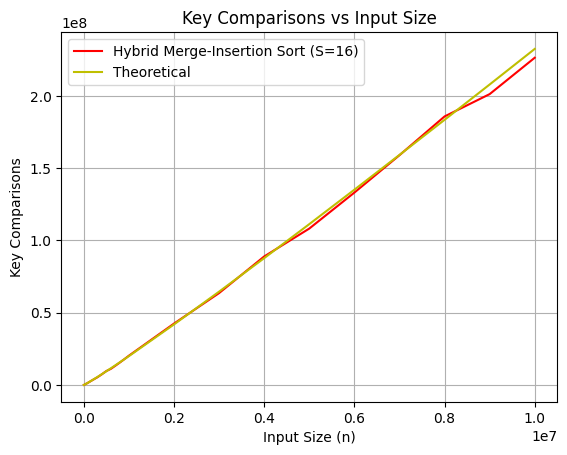

In [ ]:
theoratical_1 = [(j * np.log2(j/16)+(4*j)) for j in sizesA]

plt.plot(sizesA,kci[0], linestyle='-', color='r', label=f'Hybrid Merge-Insertion Sort (S={S[0]})')
#plt.plot(sizesA,kci[1], linestyle='-', color='g', label=f'Hybrid Merge-Insertion Sort (S={S[1]})')
plt.plot(sizesA,theoratical_1, linestyle='-', color='y', label=f'Theoretical')

plt.xlabel('Input Size (n)')
plt.ylabel('Key Comparisons')
plt.title('Key Comparisons vs Input Size')

plt.legend()
plt.grid(True)
plt.show()

## cii) Test hybrid on various size of S and fixed input(100000)

In [ ]:
timeii = [[0] * 40 for _ in range(3)]
kcii = [[0] * 40 for _ in range(3)]

for cnt,n in enumerate(N):
    for i,size in enumerate(sizesB):
        arr = generateRandomArray(n)
        start = time.time()
        kcii[cnt][i] = hybrid_sort(arr, 0,n-1, size)
        timeii[cnt][i] = time.time() - start

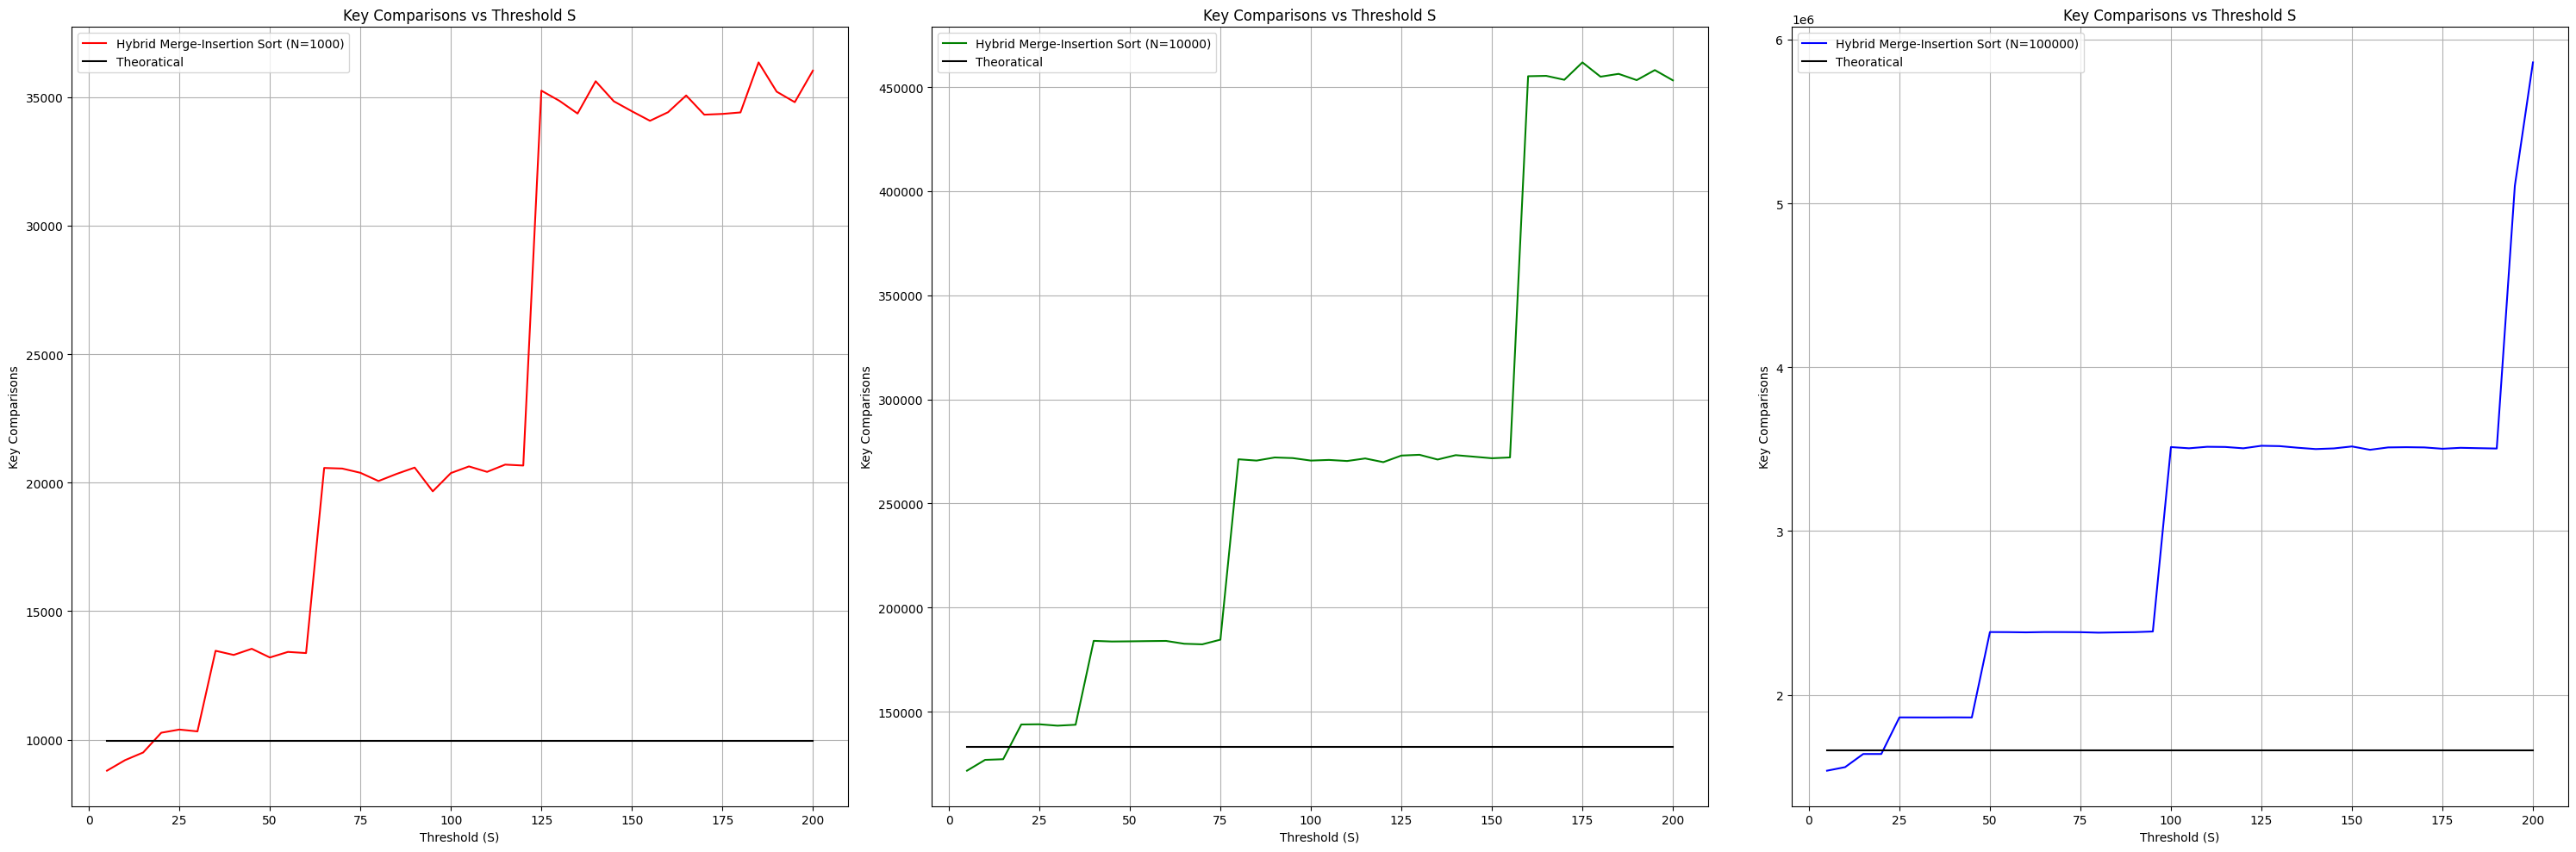

In [ ]:
theoretical_2 = [[j * np.log2(j/16)+(4*j) for _ in range(40)] for n in N]
colormaps = ['r','g','b']
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
for m, ax in enumerate(axs.flat):
  ax.plot(sizesB,kcii[m], linestyle='-', color=colormaps[m], label=f'Hybrid Merge-Insertion Sort (N={N[m]})')
  ax.plot(sizesB,theoretical_2[m], linestyle='-', color='k', label=f'Theoratical')
  ax.set_xlabel('Threshold (S)')
  ax.set_ylabel('Key Comparisons')
  ax.set_title('Key Comparisons vs Threshold S')

  ax.legend()
  ax.grid(True)

plt.tight_layout()
plt.show()

## ciii)

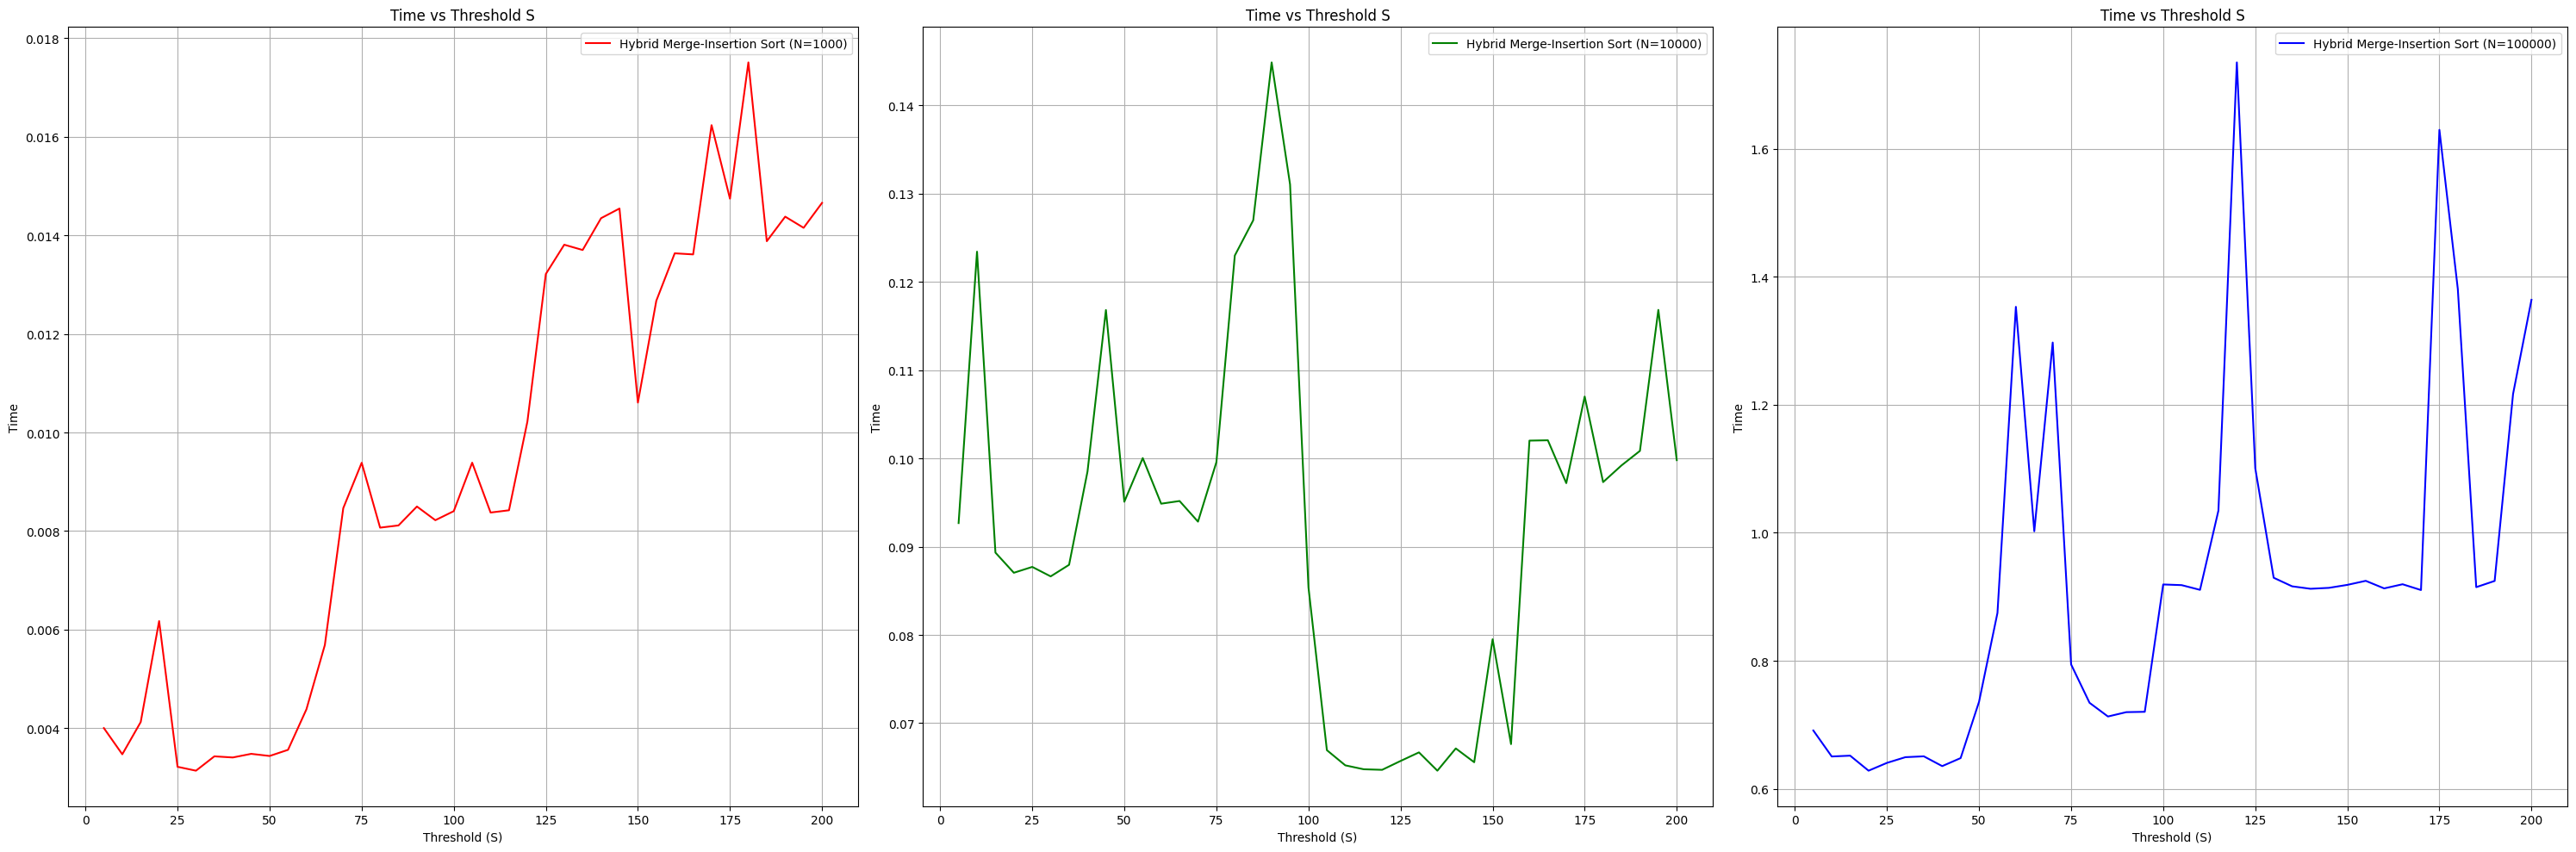

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(30, 10))
for m, ax in enumerate(axs.flat):
  ax.plot(sizesB,timeii[m], linestyle='-', color=colormaps[m], label=f'Hybrid Merge-Insertion Sort (N={N[m]})')
  ax.set_xlabel('Threshold (S)')
  ax.set_ylabel('Time')
  ax.set_title('Time vs Threshold S')

  ax.legend()
  ax.grid(True)

plt.tight_layout()
plt.show()

## d) Compare to mergesort

In [ ]:
def merge_sort(arr, l, r):
    key_comparison = 0
    if l < r:
        # Find the middle point
        m = l + (r - l) // 2

        # Sort first and second halves
        key_comparison += merge_sort(arr, l, m)
        key_comparison += merge_sort(arr, m + 1, r)

        # Merge the sorted halves
        key_comparison += merge(arr, l, m, r)
    return key_comparison



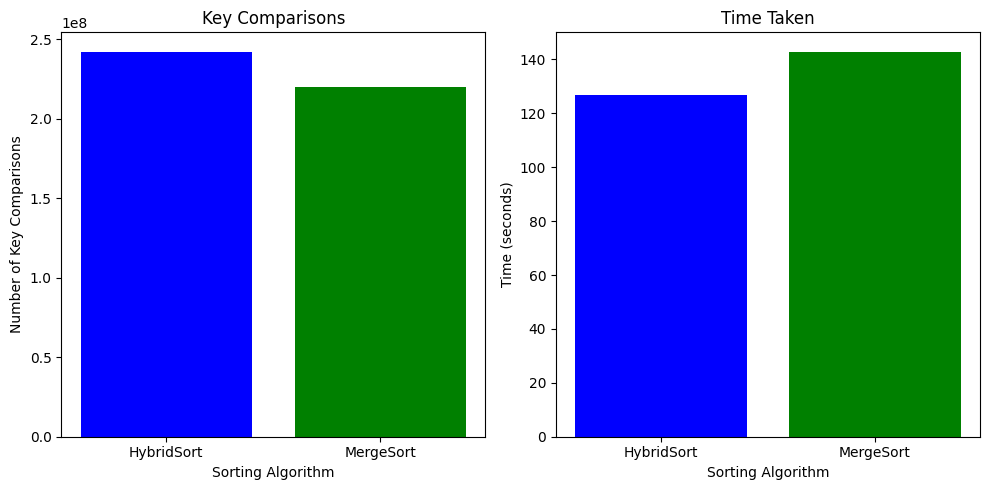

In [ ]:
#Generate a random array
S_Best = 31
N_Best = 10_000_000
arr = generateRandomArray(N_Best)
arr1 = copyArray(arr)

#Time HybridSort
start = time.time()
kc_hybrid = hybrid_sort(arr, 0,N_Best - 1, S_Best)
timetaken_hybrid = time.time() - start

#Time MergeSort
start = time.time()
kc_merge = merge_sort(arr1, 0, N_Best - 1)
timetaken_merge = time.time() - start

labels = ['HybridSort', 'MergeSort']
key_comparisons = [kc_hybrid, kc_merge]
times = [timetaken_hybrid, timetaken_merge]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First subplot for key comparisons
plt.bar(labels, key_comparisons, color=['blue', 'green'])
plt.title('Key Comparisons')
plt.xlabel('Sorting Algorithm')
plt.ylabel('Number of Key Comparisons')

# Plot for time taken
plt.subplot(1, 2, 2)  # Second subplot for time comparison
plt.bar(labels, times, color=['blue', 'green'])
plt.title('Time Taken')
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (seconds)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()